# 📕 Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import os
import pickle

# 📂 Cargar los datos de "Computer Science Students Career Prediction"

In [100]:
path = '../Data/cs_students.csv'
data = pd.read_csv(path, index_col = 'Student ID')

# 📊  Analisis exploratorio

## Se muestran los 5 primeros registros

In [101]:
data.head()

,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
Student ID,,,,,,,,,,,
1,John Smith,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
2,Alice Johnson,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
3,Robert Davis,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
4,Emily Wilson,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
5,Michael Brown,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong


## Se identifican los valores unicos

In [24]:
for i in data.columns[4:]:
    print(data[i].unique())

['Computer Science']
['Artificial Intelligence' 'Data Science' 'Software Development'
 'Web Development' 'Cybersecurity' 'Machine Learning'
 'Database Management' 'Cloud Computing' 'Mobile App Development'
 'Computer Graphics' 'Software Engineering' 'Network Security'
 'Game Development' 'Computer Vision' 'Bioinformatics'
 'IoT (Internet of Things)' 'Natural Language Processing' 'Data Mining'
 'Human-Computer Interaction' 'Biomedical Computing' 'Quantum Computing'
 'Blockchain Technology' 'Information Retrieval' 'Data Privacy'
 'Geographic Information Systems' 'Distributed Systems'
 'Digital Forensics']
['Chatbot Development' 'Data Analytics' 'E-commerce Website'
 'Full-Stack Web App' 'Network Security' 'Image Recognition'
 'SQL Query Optimization' 'AWS Deployment' 'Android App' '3D Rendering'
 'Natural Language Processing' 'iOS App' 'Game Development'
 'GCP Deployment' 'Social Media Platform' 'iOS Game' '3D Animation'
 'Machine Learning' 'Android Game' '3D Modeling' 'Firewall Manageme

## Se muestran las columnas

No existen valores nnulos dentro de el dataset, ademas se observa que la mayoria son dato categooricos por lo que se debar realizar un tratamiento a estos datos

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 1 to 180
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               180 non-null    object 
 1   Gender             180 non-null    object 
 2   Age                180 non-null    int64  
 3   GPA                180 non-null    float64
 4   Major              180 non-null    object 
 5   Interested Domain  180 non-null    object 
 6   Projects           180 non-null    object 
 7   Future Career      180 non-null    object 
 8   Python             180 non-null    object 
 9   SQL                180 non-null    object 
 10  Java               180 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 16.9+ KB


## Estadisticas de los datos

### Datos numericos

En promedio los estudiantes de ciencias de la computacion tienen 22 años y el mayor de ellos llega a tener 37 años. Mientras que sus caificaciones estan en el rango de 3.2 a 3.9 y su promeido es de 3.6. En ambos casos se observa una desviacion baja, lo que indica que la mayoria d los datos se encuentran cerca de la media.

In [27]:
data.describe()

,Age,GPA
count,180.000000,180.000000
mean,22.116667,3.615000
std,2.823040,0.177341
min,20.000000,3.200000
25%,21.000000,3.500000
50%,22.000000,3.600000
75%,22.250000,3.700000
max,37.000000,3.900000


Las graficas de densidad sostiene el argumento de la desviacion. Ademas, con estas graficas se puede inferir que en edad existen datos atipicos

<Axes: xlabel='GPA', ylabel='Density'>

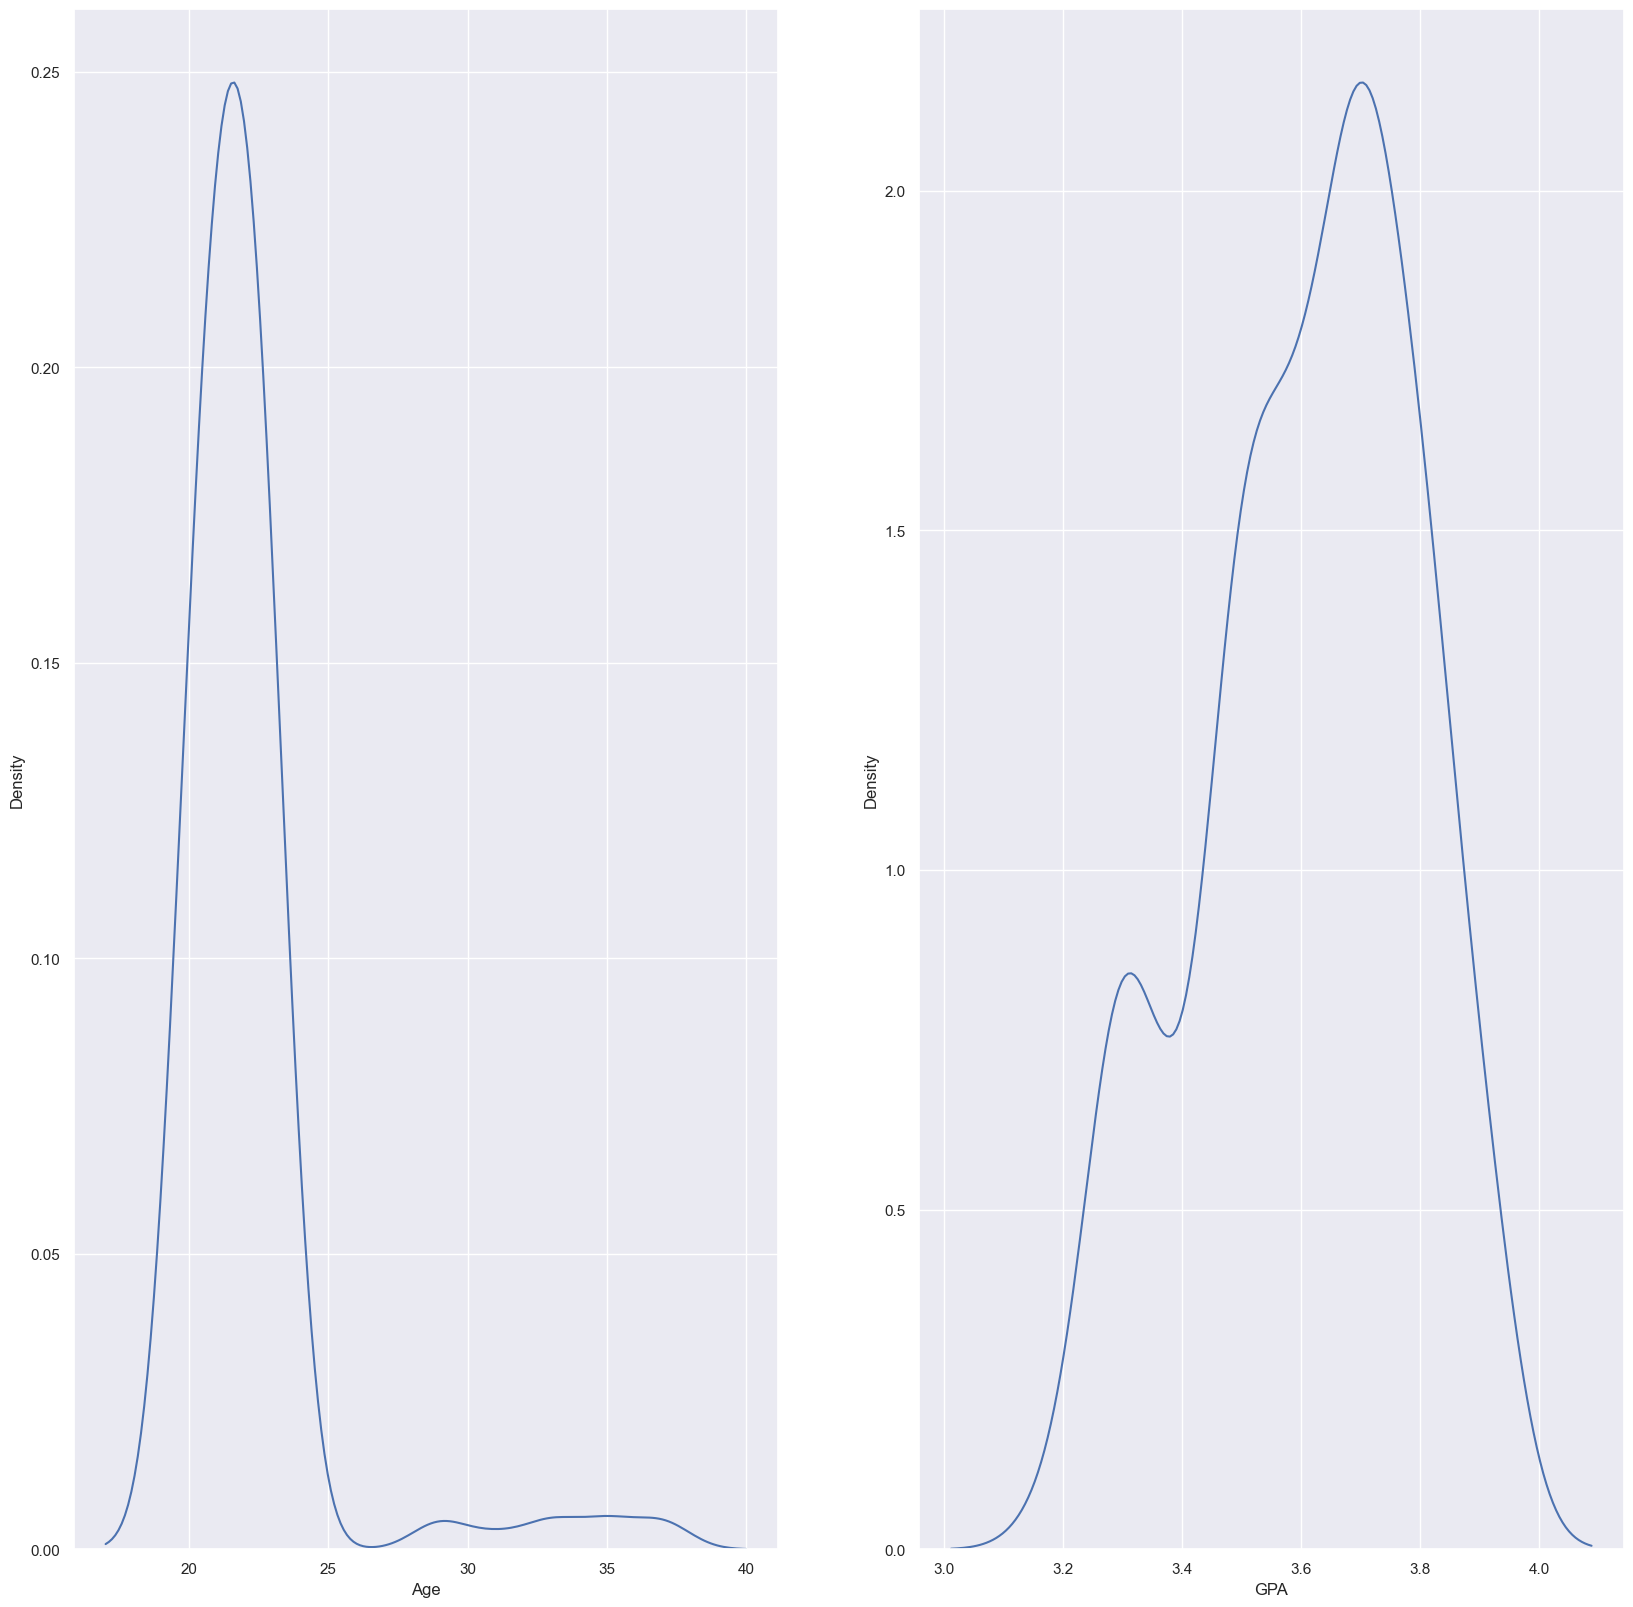

In [106]:
plt.figure(figsize = (20,20))
sns.set_theme(style='darkgrid')
plt.subplot(1,2,1)
sns.kdeplot(data['Age'])
plt.subplot(1,2,2)
sns.kdeplot(data['GPA'])

### Datos categoricos

Se videncia que la carrera que mas estudian es desarrollador web. Sin embargo se evidencia que existen otras carreras que no estan muy lejos de esto. Tambien es imporntante mencionar que existe un gran numero de carreras con 1 solo estudiante lo que podria ser resultado de un dataset desbalanceado lo que llevaria a un mayor error al momento de realizar la preducción

In [28]:
data.describe(include = ['O'])

,Name,Gender,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
count,180,180,180,180,180,180,180,180,180
unique,89,2,1,27,65,33,3,3,3
top,James Wilson,Male,Computer Science,Artificial Intelligence,Natural Language Processing,Web Developer,Strong,Strong,Strong
freq,8,102,180,19,14,19,70,79,69


In [123]:
data['Future Career'].value_counts()

Future Career
Web Developer                   19
Information Security Analyst    17
Mobile App Developer            17
Database Administrator          16
Cloud Solutions Architect       16
Software Engineer               14
Machine Learning Engineer       13
NLP Research Scientist          11
Graphics Programmer              9
Data Scientist                   8
AI Researcher                    6
Data Analyst                     6
Game Developer                   4
UX Designer                      2
Bioinformatician                 2
Healthcare IT Specialist         2
Quantum Computing Researcher     2
Geospatial Analyst               1
Data Privacy Specialist          1
SEO Specialist                   1
Distributed Systems Engineer     1
Blockchain Engineer              1
VR Developer                     1
Digital Forensics Specialist     1
Machine Learning Researcher      1
NLP Engineer                     1
IoT Developer                    1
DevOps Engineer                  1
Comput

# 📝 Preparación de los datos

## Label Encoder para datos categoricos

In [97]:
LE = LabelEncoder()
categorical_columns = ['Gender', 'Interested Domain','Projects']
for i in categorical_columns:
    data[i] = LE.fit_transform(data[i])

LE2 = LabelEncoder()
data['Future Career'] = LE2.fit_transform(data['Future Career'])

### Ordinal Encoder para datos ordinales

Ya que se evalua el nivel en distintos lenguajes de programación, se usa OrdinalEncoder para dar una relevancia a cada nivel

In [98]:
OE = OrdinalEncoder(categories=[['Weak', 'Average', 'Strong']])
Ordinal_columns = ['Python', 'SQL', 'Java']
for i in Ordinal_columns:
    data[i] = OE.fit_transform(data[[i]])


### Seleccion de feautres y labels
Se eliminan datos irrelevantes para el modelo como el nombre y Major 

In [31]:
X = data.drop(['Name', 'Major', 'Future Career'], axis = 1)
y = data['Future Career']

### Selección de caracteristicas
Se buscaron variables altamente correlacionadas que pudieronprovocar un sobreajuste en el modelo,  sin embargo en este caso no sucede por lo que se dejan todas las columnas para llevar acabo el modelado

<Axes: >

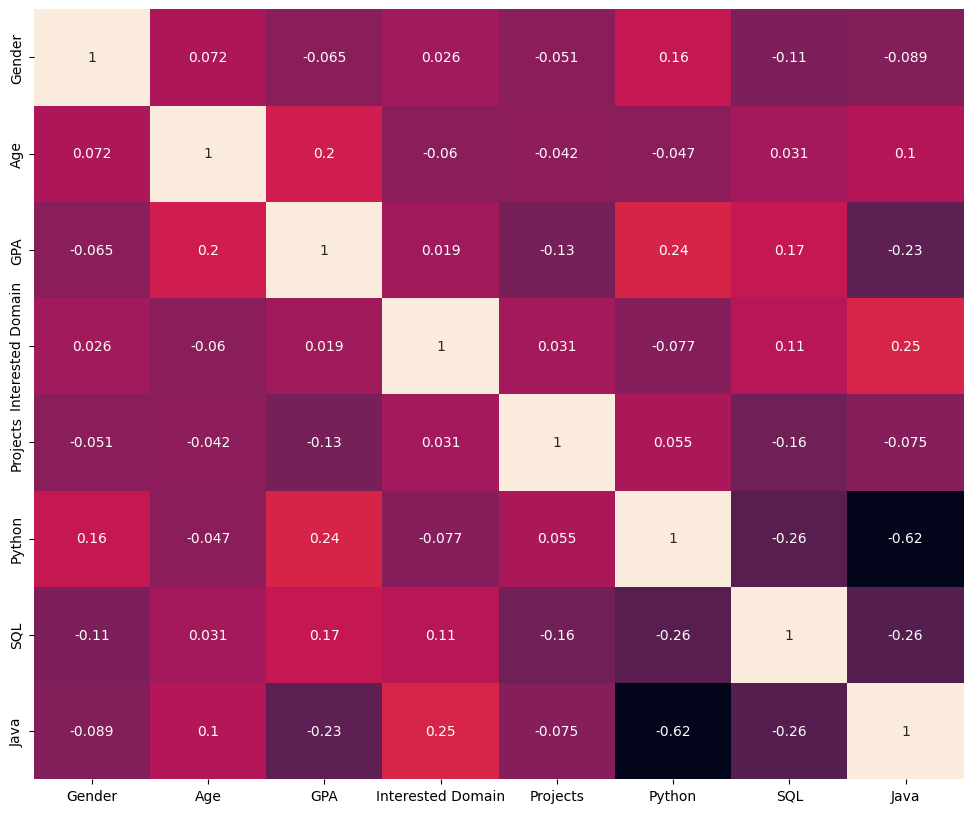

In [34]:
plt.figure(figsize = (12,10))
sns.heatmap(X.corr(), annot = True, cbar = False)

### Separacion del modelo en conjuntos de prueba y validacion

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# 🚴 Entrenamiento del modelo

Se define una funcion para la evaluacion de los datos

In [36]:
def evaluacion(y_test, y_pred, X, y, model):
  print('Reporte de clasifiación')
  print(classification_report(y_test, y_pred))

  Cross_validation = cross_val_score(model, X, y, cv = 5).mean()
  print(f"Accuracy: {Cross_validation*100:.2f} %")
  return np.round(Cross_validation*100, 2)

## Regresión logistica

In [37]:
def objective_lr(trial, X, y):
  params = {
  "C": trial.suggest_float("C", 1e-3, 1)}
  model = LogisticRegression(**params)
  accuracy = cross_val_score(model, X, y, cv = 5).mean()
  return accuracy

In [38]:
study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(lambda trial: objective_lr(trial, X, y), n_trials=30)

[I 2024-08-23 18:00:15,830] A new study created in memory with name: no-name-13388f08-3ea7-4c92-a32f-f9b6f344020b
C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_o

In [39]:
lr = LogisticRegression(**study_lr.best_params)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
Accuracy_lr = evaluacion(y_test, y_pred, X, y, lr)
Accuracy_lr

C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

Reporte de clasifiación
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         5
           5       0.50      0.50      0.50         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4
           8       0.50      1.00      0.67         4
           9       0.00      0.00      0.00         1
          14       1.00      0.50      0.67         2
          15       0.00      0.00      0.00         1
          16       1.00      1.00      1.00         1
          17       0.00      0.00      0.00         1
          18       0.83      1.00      0.91         5
          20       0.75      1.00      0.86         6
          22       0.70      0.88      0.78         8
          24       0.75      1.00      0.86         3
   

C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


64.44

## Gradient Boosting Calssifier

In [40]:
def objective_gbc(trial, X, y):
  params = {
      "learning_rate": trial.suggest_float("learning_rate", 1e-3, 1),
      "max_depth": trial.suggest_int("max_depth", 1, 10),
      "min_samples_split": trial.suggest_float("min_samples_split", 0.05, 1.0)
  }

  model = GradientBoostingClassifier(**params)
  accuracy = cross_val_score(model, X, y, cv = 5).mean()
  return accuracy

In [41]:
study_gbc = optuna.create_study(direction='maximize')
study_gbc.optimize(lambda trial: objective_gbc(trial, X, y), n_trials=30)

[I 2024-08-23 18:00:24,942] A new study created in memory with name: no-name-90df8288-ca16-46c0-b889-01004a24d39f
C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
[I 2024-08-23 18:00:39,407] Trial 0 finished with value: 0.861111111111111 and parameters: {'learning_rate': 0.36285151502598106, 'max_depth': 8, 'min_samples_split': 0.17397538548787678}. Best is trial 0 with value: 0.861111111111111.
C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
[I 2024-08-23 18:00:53,413] Trial 1 finished with value: 0.833333333

In [42]:
gbc = GradientBoostingClassifier(**study_gbc.best_params)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
Accuracy_gbc = evaluacion(y_test, y_pred, X, y, gbc)
Accuracy_gbc

Reporte de clasifiación
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           3       0.62      1.00      0.77         5
           5       0.67      1.00      0.80         2
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         4
           8       0.80      1.00      0.89         4
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.50      0.50      0.50         2
          15       0.00      0.00      0.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         5
          20       1.00      1.00      1.00         6
          22       1.00      0.62      0.77         8
          24       1.00      1.00      1.00         3
   

C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py

Accuracy: 86.11 %


86.11

## SVC

In [43]:
def objective_svc(trial, X, y):
  params = {
      "C": trial.suggest_float("C", 1e-3, 10),
      "kernel": trial.suggest_categorical('kernel',['linear', 'poly', 'rbf', 'sigmoid']),
      "gamma": trial.suggest_float('gamma', 1e-3, 10)
  }

  model = SVC(**params)
  accuracy = cross_val_score(model, X, y, cv = 5).mean()
  return accuracy

In [44]:
study_svc = optuna.create_study(direction='maximize')
study_svc.optimize(lambda trial: objective_svc(trial, X, y), n_trials=30)

[I 2024-08-23 18:07:36,364] A new study created in memory with name: no-name-69415690-d6fc-4882-801e-56826b46250e
C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
[I 2024-08-23 18:07:36,450] Trial 0 finished with value: 0.4222222222222222 and parameters: {'C': 2.802915340270258, 'kernel': 'rbf', 'gamma': 9.042972257787433}. Best is trial 0 with value: 0.4222222222222222.
C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
[I 2024-08-23 18:07:36,620] Trial 1 finished with value: 0.7777777777777779 and parameters: {

In [45]:
svc = SVC(**study_svc.best_params)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
Accuracy_svc = evaluacion(y_test, y_pred, X, y, svc)
Accuracy_svc

C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py

Reporte de clasifiación
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         5
           5       0.67      1.00      0.80         2
           6       0.00      0.00      0.00         1
           7       1.00      0.75      0.86         4
           8       0.80      1.00      0.89         4
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       1.00      0.50      0.67         2
          15       0.00      0.00      0.00         1
          16       1.00      1.00      1.00         1
          17       0.00      0.00      0.00         1
          18       0.83      1.00      0.91         5
          19       0.00      0.00      0.00         0
   

81.67

### Kneighbors Classifier

In [46]:
def objective_KN(trial, X, y):
  params = {
    'n_neighbors': trial.suggest_int('n_neighbors', 1, 10),
    'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
    'p': trial.suggest_int('p', 1, 2)
  }

  model = KNeighborsClassifier(**params)
  accuracy = cross_val_score(model, X, y, cv = 5).mean()
  return accuracy

In [47]:
study_KN = optuna.create_study(direction='maximize')
study_KN.optimize(lambda trial: objective_KN(trial, X, y), n_trials=30)

[I 2024-08-23 18:07:39,607] A new study created in memory with name: no-name-659fe10a-0cd1-4935-bf07-d9ccf1f4c264
C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
[I 2024-08-23 18:07:39,672] Trial 0 finished with value: 0.7555555555555556 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.7555555555555556.
C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
[I 2024-08-23 18:07:39,714] Trial 1 finished with value: 0.7833333333333334 and parameters: {'n_neighbors': 3, 'we

In [48]:
KN = KNeighborsClassifier(**study_KN.best_params)
KN.fit(X_train, y_train)
y_pred = KN.predict(X_test)
Accuracy_KN = evaluacion(y_test, y_pred, X, y, KN)
Accuracy_KN

Reporte de clasifiación
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         4
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          14       1.00      0.50      0.67         2
          15       0.00      0.00      0.00         1
          16       1.00      1.00      1.00         1
          17       0.00      0.00      0.00         1
          18       0.71      1.00      0.83         5
          19       0.00      0.00      0.00         0
          20       1.00      0.67      0.80         6
   

C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py

82.22

## Random Forest Classifier

In [49]:
def objective_rfc(trial, X, y):
  params = {
    'n_estimators': trial.suggest_int('n_estimators', 10,100),
    'max_depth': trial.suggest_int('max_depth', 1,20),
    'min_samples_split': trial.suggest_int('min_samples_split', 2, 10)
  
  }

  model = RandomForestClassifier(**params)
  accuracy = cross_val_score(model, X, y, cv = 5).mean()
  return accuracy

In [50]:
study_rfc = optuna.create_study(direction='maximize')
study_rfc.optimize(lambda trial: objective_rfc(trial, X, y), n_trials=30)

[I 2024-08-23 18:07:41,639] A new study created in memory with name: no-name-fae867df-6bcb-4011-96eb-1dfeed619255
C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
[I 2024-08-23 18:07:42,066] Trial 0 finished with value: 0.7444444444444444 and parameters: {'n_estimators': 45, 'max_depth': 19, 'min_samples_split': 6}. Best is trial 0 with value: 0.7444444444444444.
C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
[I 2024-08-23 18:07:42,803] Trial 1 finished with value: 0.43888888888888883 and parameters: {'n_esti

In [51]:
rfc = RandomForestClassifier(**study_rfc.best_params)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
Accuracy_rfc = evaluacion(y_test, y_pred, X, y, rfc)
Accuracy_rfc

Reporte de clasifiación
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         5
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         1
           7       0.75      0.75      0.75         4
           8       1.00      1.00      1.00         4
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          14       0.50      0.50      0.50         2
          15       0.00      0.00      0.00         1
          16       1.00      1.00      1.00         1
          17       0.00      0.00      0.00         1
          18       0.71      1.00      0.83         5
          20       0.75      1.00      0.86         6
          22       0.89      1.00      0.94         8
          24       1.00      1.00      1.00         3
   

C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Andres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py

Accuracy: 75.00 %


75.0

## Resumen del modelo

In [125]:
Nombres = ['Regresion logistica', 'GradientBoosting', 'SVC', 'KNeighbors','Random Forest']
valores = [Accuracy_lr, Accuracy_gbc, Accuracy_svc,Accuracy_KN,Accuracy_rfc]
resultados = {'Modelo': Nombres, 'Accuracy': valores}
res = pd.DataFrame(resultados)
res= res.sort_values(by = ['Accuracy'])
res

,Modelo,Accuracy
0,Regresion logistica,64.44
4,Random Forest,75.00
2,SVC,81.67
3,KNeighbors,82.22
1,GradientBoosting,86.11


El mejor modelo de los evaluados es el Gradient Boosting Classifier con un accuracy de 86.1% Por lo ue con este se procede a realizar la predicción de llas carreras

<BarContainer object of 5 artists>

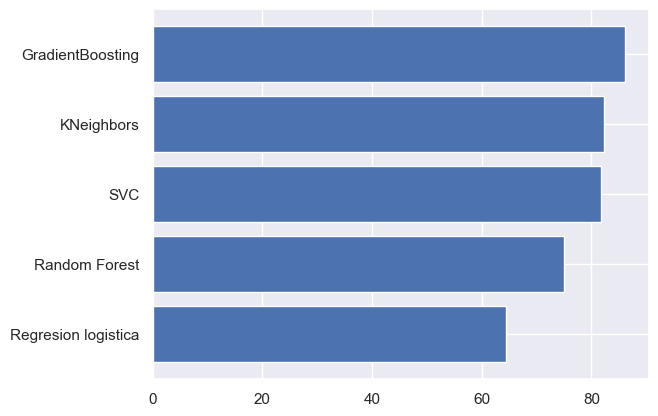

In [126]:
plt.barh(y = res['Modelo'], width = res['Accuracy'])

## Guardar modelo

In [54]:
nombre = '../Modelo/Best_model.pkl'
pickle.dump(gbc, open(nombre, 'wb'))

## Se carga el modelo

In [55]:
best_model = pickle.load(open(nombre, 'rb'))

## Se muestra la matriz de confusion del modelo

In [56]:
y_pred = best_model.predict(X_test)

<Axes: >

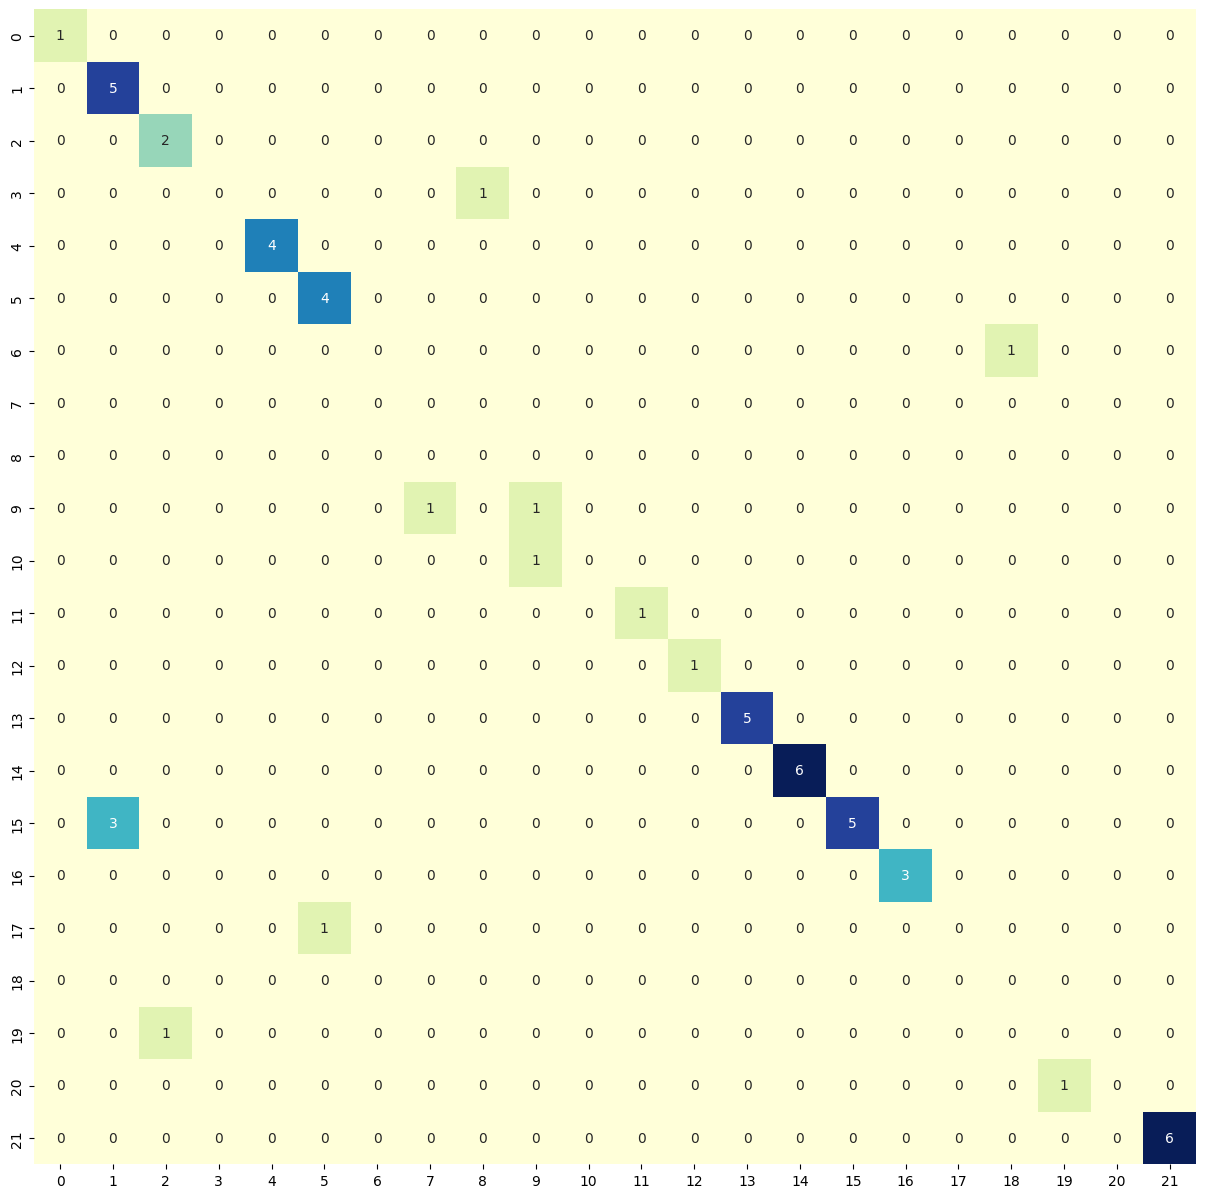

In [57]:
plt.figure(figsize = (15,15))
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar = False)